# 7. Convolutional neural network

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import GridSearchCV

plt.style.use("default")

This time we use our image data to create our own convolutional neural network.

In [2]:
%store -r X_train_img
%store -r X_test_img
%store -r y_train_img
%store -r y_test_img
%store -r classes
%store -r label_encoder

In [3]:
input_shape = X_train_img.reshape(750,218,336,1).shape[-3:]
no_logits = y_train_img.max()+1
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [4]:
X_train_img = X_train_img.reshape(750,218,336,1)
X_test_img = X_test_img.reshape(250,218,336,1)

I'll make a similar model as in the course 4 but implement it with keras.  
I make 2 convolutional layers with maxpooling and flatten in between as well as a drop out layer to prevent overfitting

In [5]:
def create_cnn(optimizer='adam',callbacks=[early_stopping]):
    cnn = keras.Sequential()
    cnn.add(Conv2D(filters=16,kernel_size=(5,5),strides=(2,2),padding="same",activation="relu",input_shape=input_shape))
    cnn.add(MaxPool2D(strides=(2,2),padding="same"))
    cnn.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
    cnn.add(MaxPool2D(strides=(2,2),padding="same"))
    cnn.add(Flatten())
    cnn.add(Dropout(0.5))
    cnn.add(Dense(units=256,activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)))
    cnn.add(Dense(units=no_logits,activation="softmax"))
    cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["acc"])
    
    return cnn

I'll use the rmsprop optimizer as it was good with the neural network previously, also I add the early stopping to prevent overfitting, then I fit my data using the batch size and epochs from the neural network

In [6]:
cnn = KerasClassifier(build_fn=create_cnn)

In [7]:
batches = [25]
param_grid = {"batch_size":batches}
cnn_gs = GridSearchCV(cnn, param_grid,cv=2,verbose=0)

In [8]:
cnn_gs.fit(X_train_img,y_train_img,epochs=25);

Epoch 1/25
375/375 [==============================] - 6s 15ms/step - loss: 4.9291 - acc: 0.1360
Epoch 2/25
375/375 [==============================] - 3s 9ms/step - loss: 2.5425 - acc: 0.3467
Epoch 3/25
375/375 [==============================] - 3s 9ms/step - loss: 2.0019 - acc: 0.5200
Epoch 4/25
375/375 [==============================] - 3s 9ms/step - loss: 1.7935 - acc: 0.6240
Epoch 5/25
375/375 [==============================] - 3s 9ms/step - loss: 1.5860 - acc: 0.7440
Epoch 6/25
375/375 [==============================] - 4s 10ms/step - loss: 1.4542 - acc: 0.8187
Epoch 7/25
375/375 [==============================] - 3s 9ms/step - loss: 1.3920 - acc: 0.8293
Epoch 8/25
375/375 [==============================] - 3s 9ms/step - loss: 1.4050 - acc: 0.8533
Epoch 9/25
375/375 [==============================] - 3s 9ms/step - loss: 1.1401 - acc: 0.9387
Epoch 10/25
375/375 [==============================] - 3s 9ms/step - loss: 0.9633 - acc: 0.9653
Epoch 11/25
375/375 [==========================

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


250/250 [==============================] - 1s 3ms/step


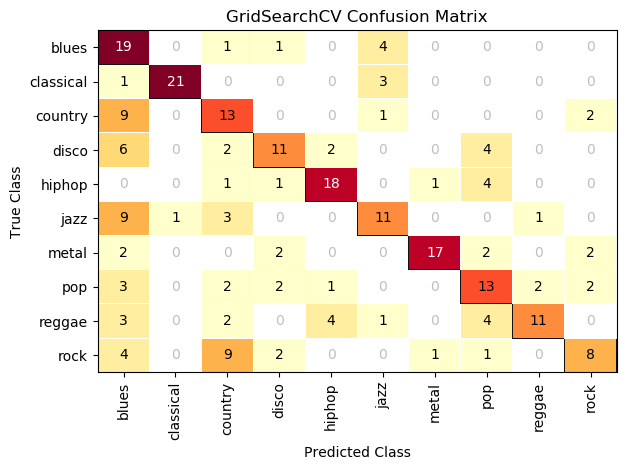

In [9]:
cm_cnn = ConfusionMatrix(cnn_gs,classes=classes,label_encoder=label_encoder,force_model=True)
cm_cnn.fit(X_train_img,y_train_img)
cm_cnn.score(X_test_img,y_test_img)
cm_cnn_fig = cm_cnn.show();

250/250 [==============================] - 0s 1ms/step


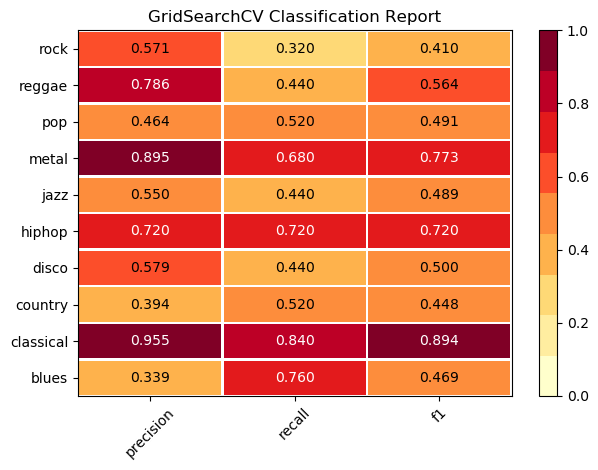

In [10]:
cnn_report = ClassificationReport(cnn_gs,encoder=label_encoder,force_model=True)
cnn_report.fit(X_train_img,y_train_img)
cnn_report.score(X_test_img,y_test_img)
cnn_report.show();

There is a lot of yellow on our classification report, this is not as good as the other models. I remember having worse results building my convnet for project 4. However I know the data size was not big before and that was the problem. Here the data is bigger yes but not big enough in my opinion. If we have more data we would have better results. We can still see in the results that some genres like classical and metal were easier to classify from the images, which doesn't surprise me as the image of metal is quite recognisable for me.